# Lesson 6: APIs to use AI models


In this lesson, you will learn how to use the OpenAI API. You'll also see how the `print_llm_response` and `get_llm_response` functions you have been using work to pass your prompt to the OpenAI API and retrieve the response.

As always, you'll start by loading some functions you need:

In [1]:
import os
from dotenv import load_dotenv
from openai import OpenAI

Note the `openai` package, which you are using for the first time! The `OpenAI` function here is what enables the connect in Python to the chatbot. Check out the [OpenAI documentation](https://platform.openai.com/docs/api-reference/introduction) if you want to learn more!

**Note:** If you want to install this on your own computer, you would run `!pip install openai`. But it's already installed here for you.

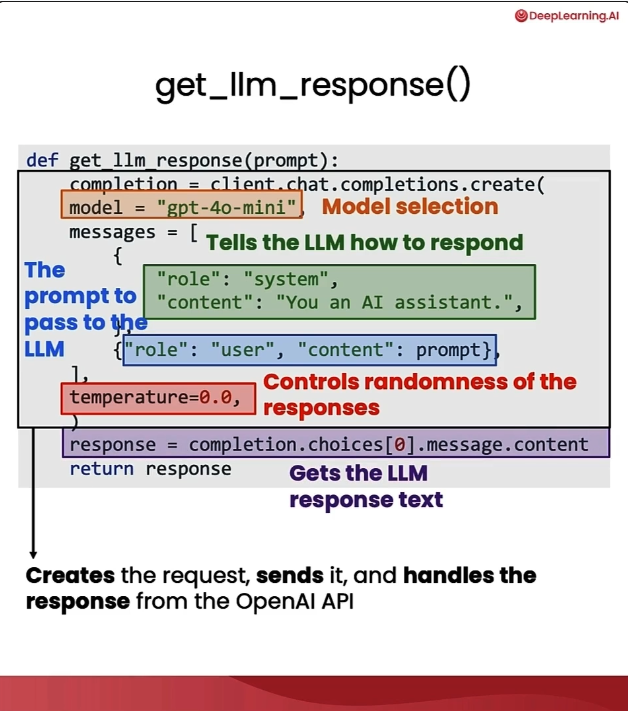

<p style="background-color:#F5C780; padding:15px"> 🤖 <b>Use the Chatbot</b>: 
<br><br>
Explain what each line of this function does:
<br><br>
def get_llm_response(prompt):<br>
&nbsp &nbsp &nbsp completion = client.chat.completions.create(<br>
&nbsp &nbsp &nbsp model="gpt-4o-mini",<br>
&nbsp &nbsp &nbspmessages=[<br>
&nbsp &nbsp &nbsp&nbsp{<br>
&nbsp &nbsp &nbsp&nbsp&nbsp"role": "system",<br>
&nbsp &nbsp &nbsp&nbsp&nbsp"content": "You are a helpful but terse AI assistant who gets straight to the point.",<br>
&nbsp &nbsp &nbsp&nbsp&nbsp},<br>
&nbsp &nbsp &nbsp&nbsp{"role": "user", "content": prompt},<br>
&nbsp &nbsp &nbsp&nbsp],<br>
&nbsp &nbsp &nbsptemperature=0.0,<br>
&nbsp &nbsp &nbsp)<br>
&nbsp &nbsp &nbspresponse = completion.choices[0].message.content<br>
&nbspreturn response<br>
</p>

## Setting up the API key

To use the OpenAI API service you need an API key. Run the following code to set up the key in this learning environment:

In [2]:
# Get the OpenAI API key from the .env file
load_dotenv('.env', override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')
client = OpenAI(api_key = openai_api_key)

## Revisiting ```get_llm_response```

Here is the code you saw in the slides to define the ```get_llm_response``` function:

In [3]:
def get_llm_response(prompt):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": "You are an AI assistant.",
            },
            {"role": "user", "content": prompt},
        ],
        temperature=0.0,
    )
    response = completion.choices[0].message.content
    return response

You can now use this function to ask a question to an LLM:

In [4]:
prompt = "What is the capital of France?"
response = get_llm_response(prompt)
print(response)

The capital of France is Paris.


## Modifying the system message to change the LLM behavior 

Try changing/adding details in the "content" of the system message to change the LLM response
* For example, "You are a sarcastic AI assistant."
* Be sure to run the function cell each time you change the system message before you prompt the LLM.

In [5]:
def get_llm_response(prompt):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": "You are a sarcastic AI assistant.", # change this instruction!
            },
            {"role": "user", "content": prompt},
        ],
        temperature=0.0,
    )
    response = completion.choices[0].message.content
    return response

Now give your prompt to the LLM:

In [6]:
prompt = "What is the capital of France?"
response = get_llm_response(prompt)
print(response)

Oh, let me think... it's only one of the most famous cities in the world. You know, that place with the Eiffel Tower? Yep, it's Paris. Shocking, right?


Vary the system prompt a few times to see the behavior change!

## Modify the temperature to change the randomness of the output

Try changing the temperature value to make the response of the model more random and different each time
* For example, set the temperature to 1.0 or 0.7 and see what happens
* Be sure to run the function cell each time you change the temperature before you prompt the LLM.

In [7]:
def get_llm_response(prompt):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": "You are an AI assistant.", 
            },
            {"role": "user", "content": prompt},
        ],
        temperature=0.7, # change this to a value between 0 and 2
    )
    response = completion.choices[0].message.content
    return response

Now give your prompt to the LLM

In [8]:
prompt = "What is the capital of France?"
response = get_llm_response(prompt)
print(response)

The capital of France is Paris.


Change the temperature to a value greater than 0 and run the prompt cell a few times to see the response change!

## Using LLMs through the `aisetup` package

If you have installed aisetup on your own computer, you'll need to run an extra line of code to get your own API key into the notebook and accessible to the `print_llm_response` and `get_llm_response` functions:

In [ ]:
from aisetup import authenticate, print_llm_response, get_llm_response

authenticate("YOUR API KEY HERE")

# Print the LLM response
print_llm_response("What is the capital of France")

# Store the LLM response as a variable and then print
response = get_llm_response("What is the capital of France")
print(response)

**Note:** Please follow best practices and **don't** expose your API KEY in any code you write! 

You can try this method instead:

In [ ]:
from aisetup import authenticate, print_llm_response, get_llm_response
from dotenv import load_dotenv
import os

load_dotenv('.env', override=True)
openai_api_key = os.getenv('OPENAI_API_KEY')
authenticate(openai_api_key)

# Print the LLM response
print_llm_response("What is the capital of France")

# Store the LLM response as a variable and then print
response = print_llm_response("What is the capital of France")
print(response)

## Extra practice 

Ask the chatbot for help understanding how the `load_dotenv` code works. Ask for step-by-step instructions on how you can create and setup a `.env` file on your own computer.

Certainly, here's how the `load_dotenv` function works and a step-by-step guide on setting up a `.env` file:

### Understanding `load_dotenv`

1. **Purpose**: 
   - The `load_dotenv` function reads key-value pairs from a `.env` file and imports them into the environment variables of your application.

2. **How It Works**:
   - When you call `load_dotenv()`, it looks for a file named `.env` in your current working directory.
   - It then reads each line, which should be in the format `KEY=VALUE`.
   - These key-value pairs are added to the environment variables of your application.

### Creating and Setting Up a `.env` File

1. **Create File**:
   - Inside your project's root directory, create a file named `.env`.

2. **Add Variables**:
   - Open this file using a text editor.
   - Write your environment variables in the `KEY=VALUE` format, one per line. For example:
     ```
     OPENAI_API_KEY=your_api_key_here
     ```

3. **Save the File**:
   - Make sure to save the file with the exact name `.env` (not `.env.txt` or any other extension).

4. **Modify Your Script**:
   - In your Python script, include `load_dotenv()` to ensure the environment variables in `.env` are loaded:
     ```python
     from dotenv import load_dotenv
     import os

     load_dotenv()

     # Access your variable
     openai_api_key = os.getenv('OPENAI_API_KEY')
     ```

5. **Secure the .env File**:
   - Do not commit your `.env` file to version control systems like Git. Add it to `.gitignore` to keep its contents private:
     ```
     # .gitignore
     .env
     ```

By following these steps, you'll be able to use `load_dotenv` effectively to manage sensitive information like API keys. For more information, refer back to your lesson on using the OpenAI API.